<a href="https://colab.research.google.com/github/JanviDharwal/UCS420/blob/main/LabAssignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


split(): ['artificial', 'intelligence', 'ai', 'is', 'revolutionizing', 'the', 'world', 'it', 'powers', 'technologies', 'like', 'chatgpt', 'autonomous', 'cars', 'and', 'recommendation', 'systems', 'with', 'ai', 'machines', 'can', 'perform', 'tasks', 'that', 'usually', 'require', 'human', 'intelligence', 'the', 'impact', 'of', 'ai', 'is', 'evident', 'in', 'healthcare', 'education', 'and', 'finance', 'however', 'ethical', 'concerns', 'are', 'also', 'rising', 'with', 'ais', 'rapid', 'growth']
word_tokenize(): ['artificial', 'intelligence', 'ai', 'is', 'revolutionizing', 'the', 'world', 'it', 'powers', 'technologies', 'like', 'chatgpt', 'autonomous', 'cars', 'and', 'recommendation', 'systems', 'with', 'ai', 'machines', 'can', 'perform', 'tasks', 'that', 'usually', 'require', 'human', 'intelligence', 'the', 'impact', 'of', 'ai', 'is', 'evident', 'in', 'healthcare', 'education', 'and', 'finance', 'however', 'ethical', 'concerns', 'are', 'also', 'rising', 'with', 'ais', 'rapid', 'growth']

Wor

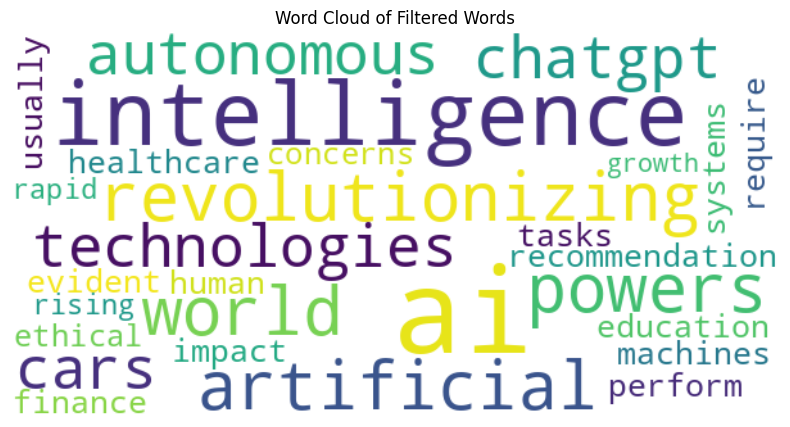

In [1]:
!pip install nltk textblob wordcloud scikit-learn keras --quiet
# Imports
import re
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


nltk.download('punkt', force=True)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

paragraph = """Artificial Intelligence (AI) is revolutionizing the world!
It powers technologies like ChatGPT, autonomous cars, and recommendation systems.
With AI, machines can perform tasks that usually require human intelligence.
The impact of AI is evident in healthcare, education, and finance.
However, ethical concerns are also rising with AI's rapid growth."""

clean_text = re.sub(f"[{string.punctuation}]", "", paragraph.lower())


try:
    word_tokens = word_tokenize(clean_text)
    sent_tokens = sent_tokenize(paragraph)
except LookupError:
    word_tokens = re.findall(r'\b\w+\b', clean_text)
    sent_tokens = paragraph.split('.')


split_words = clean_text.split()
print("split():", split_words)
print("word_tokenize():", word_tokens)


filtered_words = [w for w in word_tokens if w not in stop_words]

freq_dist = nltk.FreqDist(filtered_words)
print("\nWord Frequency Distribution (Excluding Stopwords):")
print(freq_dist.most_common(10))

wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Words')
plt.show()


In [2]:
# Q2: Regex, stemming, lemmatization


alpha_words = re.findall(r'\b[a-zA-Z]+\b', clean_text)


alpha_no_stop = [w for w in alpha_words if w not in stop_words]

stemmed = [stemmer.stem(w) for w in alpha_no_stop]

lemmatized = [lemmatizer.lemmatize(w) for w in alpha_no_stop]

print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)
print("Use lemmatization for grammar correctness; use stemming when performance is critical.")



Stemmed: ['artifici', 'intellig', 'ai', 'revolution', 'world', 'power', 'technolog', 'like', 'chatgpt', 'autonom', 'car', 'recommend', 'system', 'ai', 'machin', 'perform', 'task', 'usual', 'requir', 'human', 'intellig', 'impact', 'ai', 'evid', 'healthcar', 'educ', 'financ', 'howev', 'ethic', 'concern', 'also', 'rise', 'ai', 'rapid', 'growth']
Lemmatized: ['artificial', 'intelligence', 'ai', 'revolutionizing', 'world', 'power', 'technology', 'like', 'chatgpt', 'autonomous', 'car', 'recommendation', 'system', 'ai', 'machine', 'perform', 'task', 'usually', 'require', 'human', 'intelligence', 'impact', 'ai', 'evident', 'healthcare', 'education', 'finance', 'however', 'ethical', 'concern', 'also', 'rising', 'ai', 'rapid', 'growth']
Use lemmatization for grammar correctness; use stemming when performance is critical.


In [3]:

# Q3: Bag of Words and TF-IDF

texts = [
    "The phone has a great battery life.",
    "This laptop performs well but is expensive.",
    "Camera quality is excellent and build is premium."
]

# 1
cv = CountVectorizer()
X_bow = cv.fit_transform(texts).toarray()
print("Bag of Words:\n", X_bow)

# 2
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(texts)

# 3
feature_names = tfidf.get_feature_names_out()
for i, text in enumerate(texts):
    print(f"\nTop 3 keywords in text {i+1}:")
    scores = X_tfidf[i].toarray().flatten()
    top_indices = scores.argsort()[::-1][:3]
    for idx in top_indices:
        print(f"{feature_names[idx]}: {scores[idx]:.4f}")



Bag of Words:
 [[0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1]
 [1 0 1 0 1 1 0 0 0 2 0 0 0 0 1 1 0 0 0]]

Top 3 keywords in text 1:
the: 0.4082
life: 0.4082
phone: 0.4082

Top 3 keywords in text 2:
well: 0.3899
this: 0.3899
performs: 0.3899

Top 3 keywords in text 3:
is: 0.5275
quality: 0.3468
premium: 0.3468


In [5]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """Artificial Intelligence enables machines to think like humans."""
text2 = """Blockchain is a decentralized ledger for digital transactions."""

def safe_tokenize(text):
    try:
        from nltk.tokenize import word_tokenize
        import nltk
        nltk.download('punkt', force=True)
        return set(word_tokenize(re.sub(r"[^\w\s]", "", text.lower())))
    except:

        return set(re.findall(r'\b\w+\b', text.lower()))

set1, set2 = safe_tokenize(text1), safe_tokenize(text2)

intersection = set1 & set2
union = set1 | set2
jaccard_sim = len(intersection) / len(union)
print("\nJaccard Similarity:", jaccard_sim)

tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print("Cosine Similarity:", cos_sim)


print("Cosine is better for numerical/semantic similarity; Jaccard is simple set overlap.")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Jaccard Similarity: 0.0
Cosine Similarity: 0.0
Cosine is better for numerical/semantic similarity; Jaccard is simple set overlap.



Review: I absolutely love this product, it's amazing!
Polarity: 0.625, Subjectivity: 0.75

Review: Terrible service, very disappointing experience.
Polarity: -0.89, Subjectivity: 0.955

Review: The quality is okay, not too bad but not great either.
Polarity: -0.19999999999999996, Subjectivity: 0.6388888888888888

'I absolutely love this product, it's amazing!' → Positive

'Terrible service, very disappointing experience.' → Negative

'The quality is okay, not too bad but not great either.' → Negative


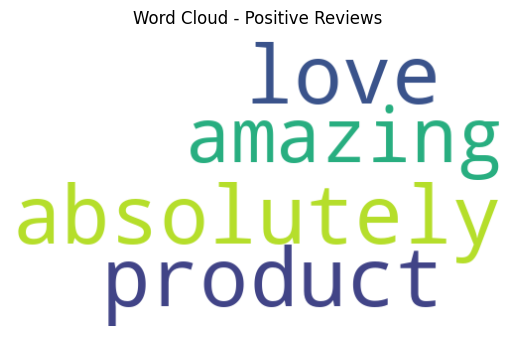

In [6]:

#Q5: Sentiment Analysis + Word Cloud

reviews = [
    "I absolutely love this product, it's amazing!",
    "Terrible service, very disappointing experience.",
    "The quality is okay, not too bad but not great either."
]

# 1
polarities = []
for review in reviews:
    analysis = TextBlob(review)
    polarities.append((review, analysis.polarity, analysis.subjectivity))
    print(f"\nReview: {review}\nPolarity: {analysis.polarity}, Subjectivity: {analysis.subjectivity}")

# 2
for review, polarity, _ in polarities:
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"\n'{review}' → {sentiment}")

# 3
positive_texts = " ".join([r for r, p, _ in polarities if p > 0])
wc = WordCloud(width=500, height=300, background_color="white").generate(positive_texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()



In [9]:

# Q6: Text Generation using LSTM
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

train_text = "Technology is evolving rapidly with innovations in artificial intelligence."

tokenizer = Tokenizer()
tokenizer.fit_on_texts([train_text])
total_words = len(tokenizer.word_index) + 1

token_list = tokenizer.texts_to_sequences([train_text])[0]
input_sequences = [token_list[:i+1] for i in range(1, len(token_list))]

max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

model = Sequential([
    Embedding(total_words, 10),
    LSTM(100),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)
seed_text = "Technology"
for _ in range(5):
    token_seq = tokenizer.texts_to_sequences([seed_text])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_seq), axis=-1)
    output_word = [word for word, index in tokenizer.word_index.items() if index == predicted][0]
    seed_text += " " + output_word

print("\nGenerated text:\n", seed_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Generated text:
 Technology is evolving rapidly with innovations
